## Notebook 14: Fitting and Hubble's Law revisited
by Rachel Langgin \\
March 2022 and July 2024 \\
Haverford College and University of Nevada, Las Vegas \\

For this notebook to work, you'll need to get one additional file from the same folder:
HubbleOriginal.png

Watch Adam Riess's nobel lecture.  You'll be working with his data later on.

https://www.nobelprize.org/prizes/physics/2011/riess/lecture/

## Goals:
* You recall what y = mx+b means
* You learn how to use python to "fit" the line to data
* Get some more practice with random numbers
* Get some more practice simulating data and testing your code

In [ ]:
from google.colab import drive
drive.mount("/content/drive") # this line only has to be run once

Mounted at /content/drive


## The equation for a line
Remember y=mx + b?

That’s the equation for a line where x is the x value, y is the y value, b is the y-intercept, and m is the slope. We’re about to practice finding the equation that best matches a bunch of data, first by estimating from looking at the data, and then by using python’s polyfit function.

## How do you get the slope?!

m = (change in y)/(change in x)

Here is Hubble’s original diagram. He mislabeled the vertical axis (I would’ve taken a point off). It should be km/s, so it’s a velocity.

[alt text](https://drive.google.com/uc?id=18e5QaBegnM5wrs6tgINBmodJRDimYm8r)
<img src='https://drive.google.com/uc?id=18e5QaBegnM5wrs6tgINBmodJRDimYm8r'>

(To get the plot to load you'll have to copy HubbleOriginal.png from the class notes directory as well.)


In this cell, estimate the slope of the line (Some hints are in the next cell)

Some hints for finding the slope:
* Over the entire line, from the lowest value to the highest value, how much does the velocity change (in km/s)?  That’s the change in y.
* Over the entire line, from the lowest value to the highest value, how much does the distance change (in Mpc)? (Remember 1 Mpc = 106 pc so the units on the horizontal axis are actually Mpc.). That’s the change in x.
* Slope is the change in y divided by the change in x.
* So what do you estimate the slope is?  
* Your answer will come out in (km/s)/Mpc (I say that “kilometers per second per mega-parsec”)


m = (change in y)/(change in x) =

That’s the slope of the line, but what you really just found was Hubble’s constant. Hubble’s law is:
$$v = Hd$$
Where $$v$$ is velocity, $$d$$ is distance, and $$H$$ is hubble’s constant.  

Another way to say it is:
H = (change in velocity)/(change in distance)


The y-intercept is the value of y when x=0, (or in our case the value of v when d=0). In other words it’s where the line crosses the y-axis.
In our case the y-intercept is 0, so instead of an equation like this:
y = mx +b
We have an equation that looks like this:
y = mx
Or
V = Hd.


I got 1000 km/s along the vertical axis, and 2 Mpc along the horizontal so I got a slope (approximately) of 500 km/s/Mpc.

If you did it in parsecs then you have 1000 km/s / 20000000 pc = .0005 km/s /pc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Task for you: Read in Hubble's original data and plot it
* It’s in /homes/astro/PHY104/HubbleOriginalData.txt
* Use pandas read_csv to read it in, delimiter=‘\t’ (tab)
* Plot velocity vs distance
* Label the axes
* Make sure it looks like the figure on the slide above. (The open circles won’t be there.)

Do that in the cell below.

In [ ]:
table = pd.read_csv('/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/HubbleOriginalData.txt', delimiter='\t')
table

,r,v
0,0.100,54.028
1,0.183,187.456
2,0.265,-55.186
3,0.348,237.745
4,0.430,227.129
5,0.513,299.882
6,0.596,132.915
7,0.678,386.107
8,0.761,354.717
9,0.843,573.596


Text(0, 0.5, 'velocity(km/s)')

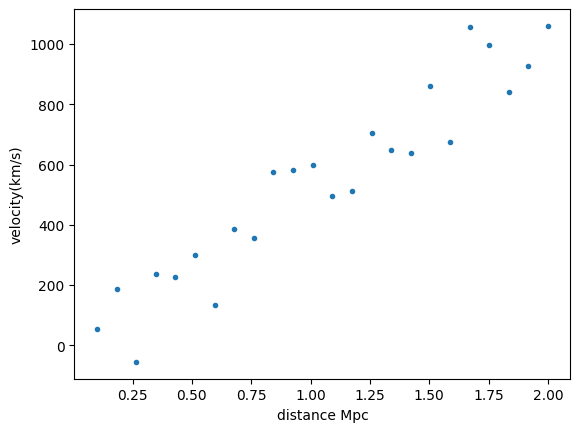

In [ ]:
plt.plot(table.r, table.v, '.')
plt.xlabel("distance Mpc")
plt.ylabel("velocity(km/s)")

## Use polyfit
Polyfit takes 3 arguments: x, y, and n where n is the order of the polynomial
* 1st order polynomial: $$y = mx+b$$
* 2nd order polynomial: $$y = Ax^2+Bx + C$$
* 3rd order polynomial: $$y = Ax^3+ Bx^2 +Cx + D$$

* What does the “order” refer to?  It’s the highest exponent of x.  See that in the equations above, e.g. the highest exponent in the 3rd order polynomial is a 3, i.e. x3.


## What does that mean? Fit a curve?
Well, when you fit a curve to a set of data, you are assuming that your measurement process is inaccurate (generally a very good assumption) and that there is some underlying physical process that the data are suggesting in their own imperfect way.  The fit tries to determine what that underlying ideal curve is.


## What does polyfit return
It returns the list of parameters: A, B, C, D, etc….

For example in this equation:

3rd order polynomial: $$y = Ax^3+ Bx^2 +Cx + D$$

So if you have a set of points x and y, and call polyfit:

```p = np.polyfit(x,y,3)```

The “p” (parameters) you get back will be:

    p=[A,B,C,D]
    
Or in other words the fit to the data x,y is:

$$y = p[0] x^3+ p[1]x^2 +p[2]x + p[3]$$

### In 10 min you'll try the following on Hubble's data, but first we're going to do all these steps on simulated/made-up/fake data.
* Plot the original points
* Fit a 1st order polynomial to them, e.g. p = polyfit(x, y, 1)
* Plot the resulting fit over the data and see if it worked
* What is the slope of the plot?  Which ”p” is that?  p[0]? p[1]?  Convince yourself you’ve got it right 3 ways:
* Look at how you plotted the resulting fit, and see which p[] the slope should be.
* Look at Hubble’s original plot and see if it matches what you think the slope should be.
* Compare the Hubble ‘constant’ you get to the accepted value of 72 km/s per Mpc.  (This way won’t work as well as the first two, but it shouldn’t be more than an order of magnitude (a factor of 10) off!)


In [ ]:
## Let's try it on some fake data set first, and then I'll let you do it yourself on
## Hubble's actual data
## This, by the way, might be the kind of thing you do to test your code in your project

# Also, there's a bad idea in this cell that causes trouble later on.  See if you can
# guess what it is.


## CREATE SIMULATED DATA!!!!!
x = np.arange(100)
y = 3*x + 7      # Create y values that corespond to a polynomial
y = y + 100*np.random.random(100) # Add random values between 0 and 100
plt.plot(x,y, ".")

In [ ]:
p=np.polyfit(x,y,1)
p

In [ ]:
# Let's see what the fitted line looks like on the data
bestfity = p[0]*x + p[1]


In [ ]:
plt.plot(x,y, ".")
plt.plot(x, bestfity)

Why did we got such a different
y-intercept from the one we put in (We put in 7 and got 58).
We figured out that it's because I used np.random.random
to add the random noise.  np.random.random "Return random floats in the half-open interval [0.0, 1.0)]." (I got that from search the web for "numpy.random.random." It's math-speak for "I'm going to give you a
random number between 0 and 1.). So all of our numbers were above 0, i.e. positive.

What we really wanted was random numbers that were Gaussian (Normally) distributed and centered on zero.  To do that we wanted to use...

In [ ]:
np.random.normal(0,1,10)  # Centered on 0, stdev of 1, 10 numbers

That looks much better - those are on either side of 0.  Let's try our experiment again using these random numbers.

In [ ]:
## CREATE SIMULATED DATA!!!!!
x = np.arange(100)
y = 3*x + 7
y = y + np.random.normal(0,100,100) # Gave it a stdev of 100
# instead of multiplying the random number by 100
# Fit
p=np.polyfit(x,y,1)
plt.plot(x,y, ".")
# Let's see what the fitted line looks like on the data
bestfity = p[0]*x + p[1]
plt.plot(x,y, ".")
plt.plot(x, bestfity)
# Print the best fit values
print("The fit returned a slope of %1.1f and a y-intercept of %1.1f" %(p[0],p[1]))

Okay that's pretty interesting --- run the cell above a bunch of different times (just go back up and press "shift-enter" again) and you'll get a different "realization" of the noise every time. In other words the random noise we added will look different. What I find so interesting is that the slope of the plot is usually close to 3, but
the y-intercept is ALL OVER THE PLACE!!!  To be fair, we added a huge amount of noise to the data. But it's interesting how much more the noise affects the y-intercept than it does the slope.

## Now try it yourself on the Hubble data (same csv we read it at the start of class)
* Plot the original points
* Fit a 1st order polynomial to them, e.g. p = polyfit(x, y, 1)
* Plot the resulting fit over the data and see if it worked
* What is the slope of the plot?  Which ”p” is that?  p[0]? p[1]?  Convince yourself you’ve got it right 3 ways:
* Look at how you plotted the resulting fit, and see which p[] the slope should be.
* Look at Hubble’s original plot and see if it matches what you think the slope should be.
* Compare the Hubble ‘constant’ you get to the accepted value of 72 km/s per Mpc.  (This way won’t work as well as the first two, but it shouldn’t be more than an order of magnitude (a factor of 10) off!)

# My solution for fitting the Hubble Data


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/HubbleOriginalData.txt", delimiter='\t')
# If you don't already have these data in your area, you can
# find it in /GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/

In [ ]:
data

In [ ]:
plt.plot(data.r, data.v,'.')
plt.xlabel("Mpc")
plt.ylabel("km/s")
# This syntax works whenever the column names are nice
# simple strings
# with no spaces or weird characters in them
# Other ways to get a column include
# data["r"]
# data.loc[:,"r"]   <- this one is nicewhen you want to use
# np.where to specify which rows you want

In [ ]:
# Fit the data to a 1st order polynomial
parameters = np.polyfit(data.r, data.v, 1)

In [ ]:
parameters

The important part here is that np.polyfit returns a list of parameters, not a list of fitted values.

In [ ]:
# To plot the fitted line you need to calculate what
# y-values it fitted to some set of x-values.  We can
# just use the distance data as our x-values.
fittedline = parameters[0]*data.r + parameters[1]

In [ ]:
# Plot the data and then the fitted line.
plt.plot(data.r, data.v,'.')
plt.plot(data.r, fittedline)
plt.xlim(0,2)

## How close did we get to the expected value of 72 km/s per Mpc?

In [ ]:
# The slope is:
parameters[0]

454 km/s per Mpc!!   That's much different than the modern value of 72 km/s per Mpc. (It's really hard to measure distance in astronomy.  That's the moral of this story.)

## Plotting residuals
This is something we'll do in class on Tuesday. It's a way to measure how good your model is.

In [ ]:
## Plotting residuals (This is something we'll in class soon)
# Returning to our 1st order polynomial, otherwise known as a
# line
parameters = np.polyfit(data.r, data.v, 1)
fittedline = parameters[0]*data.r + parameters[1]
residuals = fittedline -data.v
plt.plot(data.r, residuals, ".")

Those look indistinguisable from a scatter plot.  Which is what you want from residuals.  (They're called "residual" because they are what's left over after you do the fit.)

# If we have some more time I'm going to go back to an exercise I gave you before break....

# Multiple return values, and random numbers
A function can return more than one thing.  Let's pretend that we want to test out this random.normal function and see if the mean and standard deviation of the numbers it creates is really the ones we put in.  We will test it by creating 1000 sets of random numbers and seeing how much the actual mean of the data differs from the mean we passed
to random.normal.  Similarly, how much does the standard deviation of the data differ from the standard deviation we passed it.

a) Write a new function that creates a normal
distribution of random numbers, accepting the center, width, and number of values of the distribution as its arguments, and returns the mean and standard deviation of those values.

Practice building up your function slowly.  First have it do only one really simple thing.  Make sure it can do that. Then slowly build up its capacities.

b) Create a loop that goes from N=1 to N=1000 and calculates the absolute value of the difference between the center you input into your function and the mean your function returned for N values in the distribution.  (In other words, each time through the loop you'll ask python to create N random numbers in the distribution with the same center and standard deviation.)  First talk with your partner about what you expect to observe in this assignment.  Plot the difference between the two numbers as a function of N.

c) Bonus: Do the same as b, but for standard deviation

In [ ]:
# to calculate the mean and standard deviation use np.mean, np.stdev
y = np.arange(4)
print(np.mean(y))
print(np.std(y))

# Rachel's answers

In [ ]:
# Part a
def calc_mean_stdev(center, width, number):
    x = np.random.normal(center,width, number)
    return(np.mean(x), np.std(x))

In [ ]:
# Part b
diffmean=[]
for n in range(1,1000):
    y, x = calc_mean_stdev(0,1,n)
    diffmean.append(np.abs(y - 0))
plt.plot(diffmean)


In [ ]:
# Part c
diffstdev=[]
for n in range(1,1000):
    y, x = calc_mean_stdev(0,1,n)
    diffstdev.append(np.abs(x - 1))
plt.plot(diffstdev)

## The moral of the story is that the more random numbers you create, the closer the mean and standard deviation will get to the nominal mean and standard deviation.